### 1 Hierarchical Clustering

**Given the following dataset shown in Figure 1, please answer the following
questions. Please answer the following questions. You may either solve by
hand, typeset, or creating python script.**

**1. Show the dendrogram resulting from the single-link hierarchical agglomerative
clustering approach using the L1 − norm as the distance between
two points.**

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs, load_iris

import warnings
warnings.filterwarnings("ignore")

In [234]:
# Generate some sample data
D = np.array([
    [5, 8],
    [6, 7],
    [6, 5],
    [2, 4],
    [3, 4],
    [5, 4],
    [7, 4],
    [9, 4],
    [3, 3],
    [8, 2],
    [7, 5]
])

DF = pd.DataFrame(D)
DF = DF.rename(columns = {0:'Column_X', 1:'Column_Y'})
Index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

DF

,Column_X,Column_Y
0,5,8
1,6,7
2,6,5
3,2,4
4,3,4
5,5,4
6,7,4
7,9,4
8,3,3
9,8,2


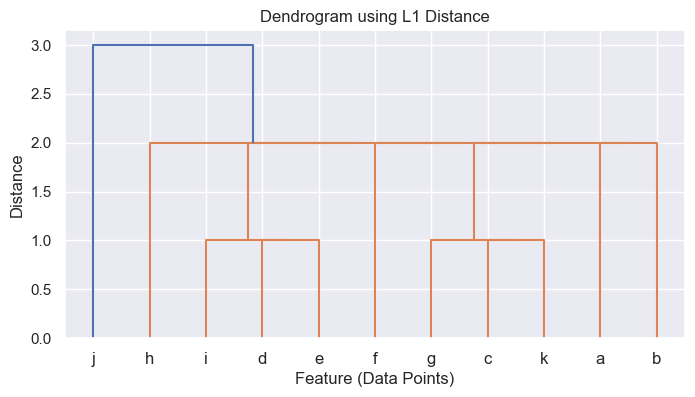

In [235]:
d_matrix = pdist(DF, metric='cityblock')  #Formation of distance matrix with L1 norm

linkage_matrix = linkage(d_matrix, method='single')     #Performing Hierarchical Clustering  

plt.figure(figsize=(8, 4))                               #Plotting Dendograms
dendrogram(linkage_matrix, labels = Index, leaf_rotation=0)
plt.xlabel('Feature (Data Points)')
plt.ylabel('Distance')
plt.title('Dendrogram using L1 Distance')
plt.show()

**2. Show the merge order tree and table, stopping when you have k = 4. Merge the clusters by taking the minimum feature
values of data points.**

**Solved by hand in pdf**

**3. Cluster the dataset using bisecting k-Means with k = 4 and plot the
dataset with the corresponding cluster assignments.**

**Plot of given data set**

Text(0, 0.5, 'feature 2')

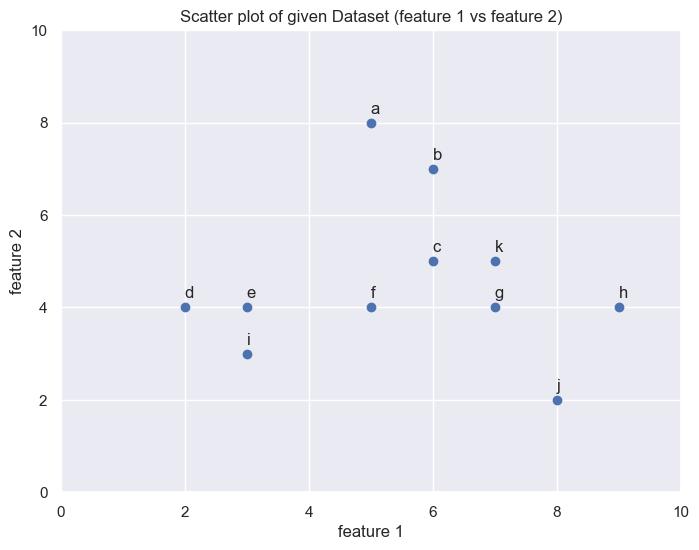

In [237]:
X = DF['Column_X'].to_numpy()
Y = DF['Column_Y'].to_numpy()

plt.figure(figsize=(8, 6))          #Plotting of given dataset
plt.title('Scatter plot of given Dataset (feature 1 vs feature 2)')
plt.scatter(DF.Column_X, DF.Column_Y)
for i in range(len(X)): 
    plt.annotate( Index[i], (X[i], Y[i] + 0.2))

plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

**Bisecting KMeans**

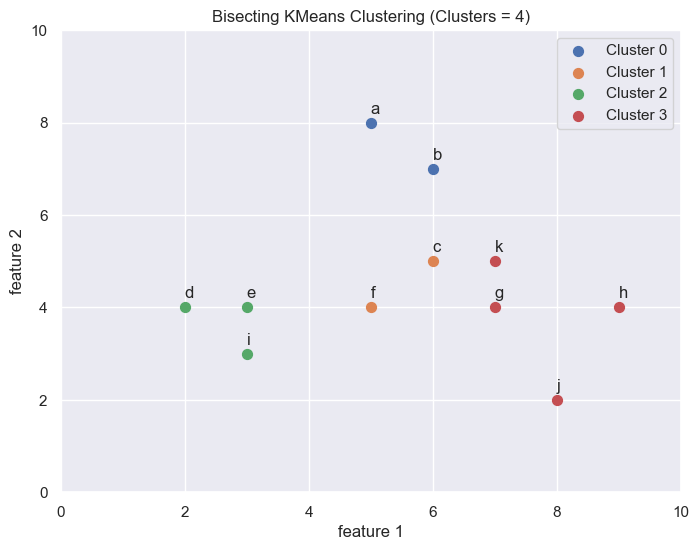

In [238]:
from sklearn.cluster import BisectingKMeans

bisect_means = BisectingKMeans(n_clusters=4).fit(D)
cluster_labels = bisect_means.labels_


plt.figure(figsize=(8, 6))
for cluster_id in np.unique(cluster_labels):
    cluster_data = D[cluster_labels == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', s=50)
    
for i in range(len(X)): 
    plt.annotate( Index[i], (X[i], Y[i] + 0.2))

plt.title('Bisecting KMeans Clustering (Clusters = 4)')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend()
plt.show()


**4. How do the results of the hierarchical agglomerative clustering compare
with the clustering of bisecting k-Means for this dataset?**

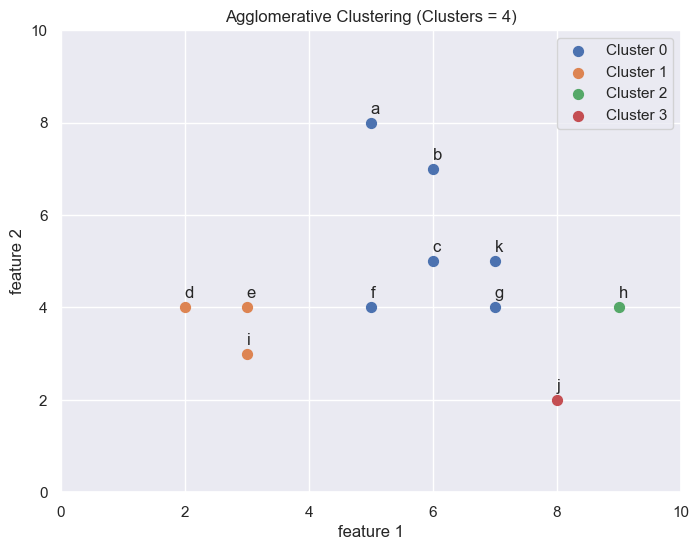

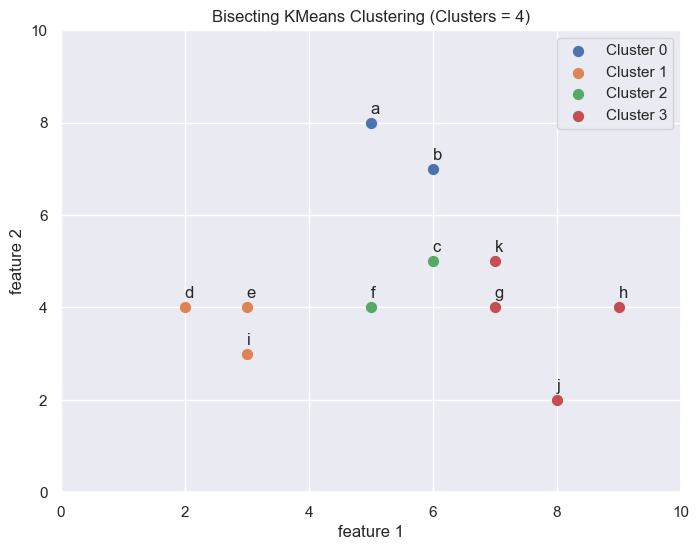

In [272]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

#Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=4, linkage = 'single', affinity = 'cityblock').fit(D)
cluster_labels = clustering.labels_

plt.figure(figsize=(8, 6))
for cluster_id in np.unique(cluster_labels):
    cluster_data = D[cluster_labels == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', s=50)
    
for i in range(len(X)): 
    plt.annotate( Index[i], (X[i], Y[i] + 0.2))

plt.title('Agglomerative Clustering (Clusters = 4)')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend()
plt.show()

#Bisecting Kmeans for comparision

bisect_means = BisectingKMeans(n_clusters=4).fit(D)
cluster_labels = bisect_means.labels_

plt.figure(figsize=(8, 6))
for cluster_id in np.unique(cluster_labels):
    cluster_data = D[cluster_labels == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', s=50)
    
for i in range(len(X)): 
    plt.annotate( Index[i], (X[i], Y[i] + 0.2))

plt.title('Bisecting KMeans Clustering (Clusters = 4)')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend()
plt.show()


In [274]:
clustering.labels_

array([0, 0, 0, 1, 1, 0, 0, 2, 1, 3, 0], dtype=int64)

In [275]:
bisect_means.labels_

array([0, 0, 2, 1, 1, 2, 3, 3, 1, 3, 3])

We cannot say that there is no proper comparision between the two clusterings because some of the cluster points like d,e,i is clustered in the same way, while rest of them are not clustered the same.

### 3 Mean Shift Clustering

**1. Use Mean Shift to cluster the data with bandwidth = 1 (use the default
settings of the algorithm in Sklearn).
(a) Plot the two features with the associated class labels for each data
point.**

In [5]:
from sklearn import datasets
iris = datasets.load_iris()

Iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)     #Creating data frame with Iris dataset

Iris_df['species'] = iris.target   


In [6]:
Iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
Iris_df = Iris_df[["petal length (cm)", "petal width (cm)", "species"]]

Iris_df

,petal length (cm),petal width (cm),species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [8]:
Target_names = dict(enumerate(iris['target_names']))
Target_names

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

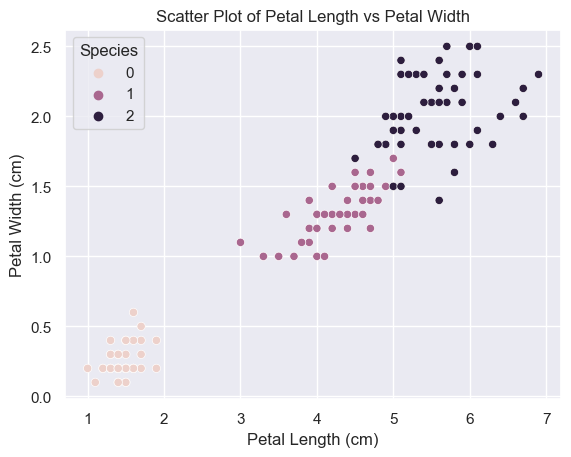

In [253]:
sns.set(style="darkgrid")
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="species", data=Iris_df)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Scatter Plot of Petal Length vs Petal Width")
plt.legend(title="Species")
plt.show()

**(b) Plot the two features with the associated cluster labels for each data
point.**

In [254]:
df = iris.data

iris_df = df[:, 2:4]         #Including only petal length and petal width

meanshift = MeanShift(bandwidth=1)         #Meanshift with bandwidth=1
meanshift.fit(iris_df)

cluster_labels = meanshift.labels_                 #Getting cluster labels
cluster_centers = meanshift.cluster_centers_       #Getting cluster centres

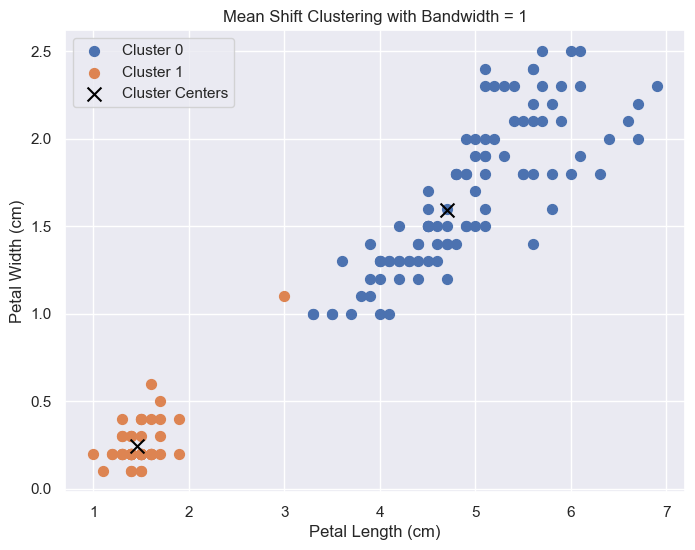

In [255]:
plt.figure(figsize=(8, 6))                         #Plotting the data with the associated cluster labels
for cluster_id in np.unique(cluster_labels):
    cluster_data = iris_df[cluster_labels == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', s=50)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', label='Cluster Centers', s=100)
plt.title(f'Mean Shift Clustering with Bandwidth = {bandwidth}')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

**(c) Report the Silhouette index for the resulting clustering assignments.**

In [256]:
from sklearn.metrics import silhouette_score                     #Calculating the Silhouette Score

silhouette_avg = silhouette_score(iris_df, cluster_labels)
print(f"Silhouette Score for mean shift clustering: {silhouette_avg:.2f}")

Silhouette Score for mean shift clustering: 0.77


**2. Compare the initial bandwidth clustering results with the clustering results
of the bandwidth estimation function is Sklearn.
(a) Report the estimated bandwidth value.**

In [257]:
data = iris.data                          #Calculating the estimated bandwidth

dset = data[:, 2:4]

estimated_bandwidth = estimate_bandwidth(dset)
print(f"Estimated Bandwidth: {estimated_bandwidth:.2f}")

Estimated Bandwidth: 0.73


**(b) Plot the two features with the associated cluster labels for each data
point using the bandwidth from the estimation function.**

In [261]:
data = iris.data

dset = data[:, 2:4]              #Including only petal length and petal width from the iris data

estimated_bandwidth = estimate_bandwidth(dset)

meanshift_estimated = MeanShift(bandwidth=estimated_bandwidth)          #Meanshift with estimated bandwidth
meanshift_estimated.fit(dset)

cluster_label = meanshift_estimated.labels_                            #Getting cluster labels
cluster_centers = meanshift_estimated.cluster_centers_                  #Getting cluster centers

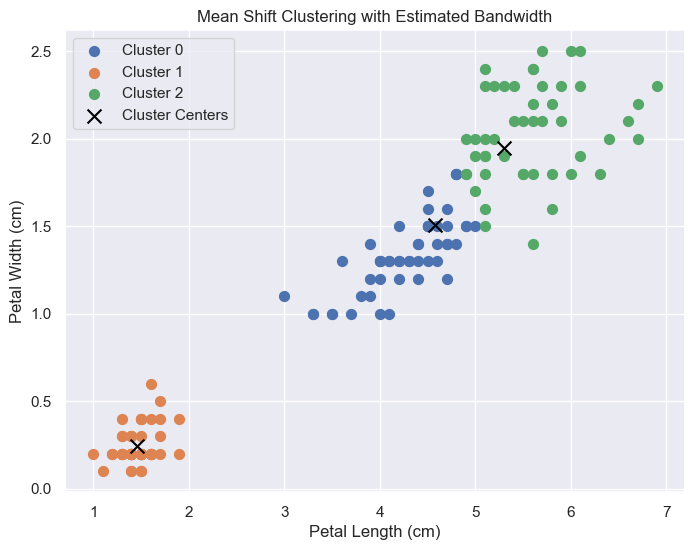

In [262]:
# Plot the dataset with associated cluster labels
plt.figure(figsize=(8, 6))
for cluster_id in np.unique(cluster_label):
    cluster_data = dset[cluster_label == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', s=50)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', label='Cluster Centers', s=100)
plt.title(f'Mean Shift Clustering with Estimated Bandwidth')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

In [263]:
silhouette_avg = silhouette_score(iris_df, cluster_label)
print(f"Silhouette Score for estimated bandwidth: {silhouette_avg:.2f}")

Silhouette Score for estimated bandwidth: 0.66


**(c) Which bandwidth leads to the “optimal” clustering for the dataset?
Justify your answer.**

Estimated bandwith clustering leads to the optimal clustering of the dataset because the for given species i.e 3 the estimated band width clustered it in 3 clusters while the Mean shift clustering clustered it in 2 clusters.

### 4. Bayesian and Nearest Neighbor Classification

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [219]:
df = pd.read_csv('Assignment_3_Dataset.txt', sep='\t', header=0)

df.head(5)

,Species,FrontalLip,RearWidth,Length,Width,Depth
0,0,20.6,14.4,42.8,46.5,19.6
1,1,13.3,11.1,27.8,32.3,11.3
2,0,16.7,14.3,32.3,37.0,14.7
3,1,9.8,8.9,20.4,23.9,8.8
4,0,15.6,14.1,31.0,34.5,13.8


In [220]:
X = df[['FrontalLip', 'RearWidth', 'Length', 'Width', 'Depth']].to_numpy()
Y = df[['Species']].to_numpy()


In [221]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, shuffle = False)

**Gaussian Naive Bayes**

In [222]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

predict_X_train = gnb.predict(X_train)
 
con_matrix_train = confusion_matrix(Y_train, predict_X_train)
con_matrix_train

array([[47, 25],
       [28, 40]], dtype=int64)

In [223]:
predict_X_test = gnb.predict(X_test)
 
con_matrix_test = confusion_matrix(Y_test, predict_X_test)
con_matrix_test

array([[19,  9],
       [14, 18]], dtype=int64)

In [224]:
print('Accuracy Score:', accuracy_score(Y_test, predict_X_test))
print('Precision Score:', precision_score(Y_test, predict_X_test))
print('Recall Score:', recall_score(Y_test, predict_X_test))
print('F1 Score:', f1_score(Y_test, predict_X_test))

Accuracy Score: 0.6166666666666667
Precision Score: 0.6666666666666666
Recall Score: 0.5625
F1 Score: 0.6101694915254238


**K Nearest Neighbours**

In [225]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

predict_X_train1 = knn.predict(X_train)
con_matrix_train = confusion_matrix(Y_train, predict_X_train1)
con_matrix_train

array([[67,  5],
       [ 2, 66]], dtype=int64)

In [226]:
predict_X_test1 = knn.predict(X_test)
 
con_matrix_test = confusion_matrix(Y_test, predict_X_test1)
con_matrix_test

array([[23,  5],
       [ 3, 29]], dtype=int64)

In [227]:
print('Accuracy Score:', accuracy_score(Y_test, predict_X_test1))
print('Precision Score:', precision_score(Y_test, predict_X_test1))
print('Recall Score:', recall_score(Y_test, predict_X_test1))
print('F1 Score:', f1_score(Y_test, predict_X_test1))

Accuracy Score: 0.8666666666666667
Precision Score: 0.8529411764705882
Recall Score: 0.90625
F1 Score: 0.8787878787878787


Here for K nearest neighbours the F1 score, accuracy score, precision score and recall score, all are higher that Gaussian bayes. Hence KNN performs better than Gaussian Naive Bayes.

KNN - Advantages 
1. KNN is intuitive and simple. It has no assumptions.
</br>2.It is very easy to implement for multiclass problems and can be used for both classification and regression.
</br>Disadvantages
1. KNN is a slow algorithm
2. Imbalance data in KNN causes problems

GNB -Advantages
1. Fast and flexible model gives highly reliable results.
</br>2.Works well with large dataset

</br> Disadvantages
1. Large data record are required to achieve good results.
</br>2.Sometimes shows lower performance than other classifiers.

Refrences - https://numpy.org/doc/stable/reference/index.html

     https://scikit-learn.org/stable/tutorial/basic/tutorial.html
    
     https://matplotlib.org/stable/tutorials/introductory/pyplot.html
    
    https://pandas.pydata.org/docs/user_guide/10min.html
        
    https://seaborn.pydata.org/generated/seaborn.scatterplot.html
     
    https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
        
    